In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import datasets, svm, metrics

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

##### 1、加载手写数字数据集
—— datasets.load_digits() 系统自带的手写数字图，图中每个数据点都是一个数字的8x8图像
#返回字典对象：属性data - 样本数据，target - 样本的分类标签，target_names - 标签的含义；images - 每个样本的像素

In [4]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

##### 2、获取样本数量，并将图片数据格式化，以匹配样本维度
#该方法下，要求所转换的图片的像素点是一致的，这样转换而成的向量才会保持维度一致，否则无法计算

In [11]:
print(digits.images.shape)

(1797, 8, 8)


In [17]:
n_samples = len(digits.data)   # 获取样本数量，等于1797
data = digits.images.reshape((n_samples, -1))   # 使样本可以一一对应image数据的一维向量
data.shape

(1797, 64)

##### 3、数据分割

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, train_size=0.5, random_state=14)   # 对半分割

##### 4、SVM模型构建 + 模型训练 + 预测 + 评估 

In [26]:
classifier = svm.SVC(gamma=0.001)   # 默认是rbf

classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

—— classification_report 生成一个分类报告

In [27]:
predicted = classifier.predict(x_test)

print("分类器%s的分类效果:\n%s\n"% (classifier, metrics.classification_report(y_test, predicted)))

分类器SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)的分类效果:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.93      1.00      0.96        80
           2       1.00      1.00      1.00        75
           3       1.00      0.98      0.99        96
           4       1.00      1.00      1.00        84
           5       0.98      1.00      0.99        84
           6       1.00      0.99      0.99        91
           7       0.99      1.00      0.99        94
           8       0.98      0.95      0.96        97
           9       1.00      0.97      0.99       111

   micro avg       0.99      0.99      0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




—— confusion_matrix 计算混淆矩阵

In [28]:
print("混淆矩阵为:\n%s" % metrics.confusion_matrix(y_test, predicted))
print("score_svm:\n%f" % classifier.score(x_test, y_test))      # 计算准确率

混淆矩阵为:
[[ 87   0   0   0   0   0   0   0   0   0]
 [  0  80   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   0   0  94   0   0   0   1   1   0]
 [  0   0   0   0  84   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0]
 [  0   0   0   0   0   1  90   0   0   0]
 [  0   0   0   0   0   0   0  94   0   0]
 [  0   5   0   0   0   0   0   0  92   0]
 [  0   1   0   0   0   1   0   0   1 108]]
score_svm:
0.987764


对混淆矩阵的说明：左上角为1 - 1，y轴为正确值，x轴为预测值

当正确值为9的时候，预测为2的有1个；当正确值为4的时候，预测为8的有1个

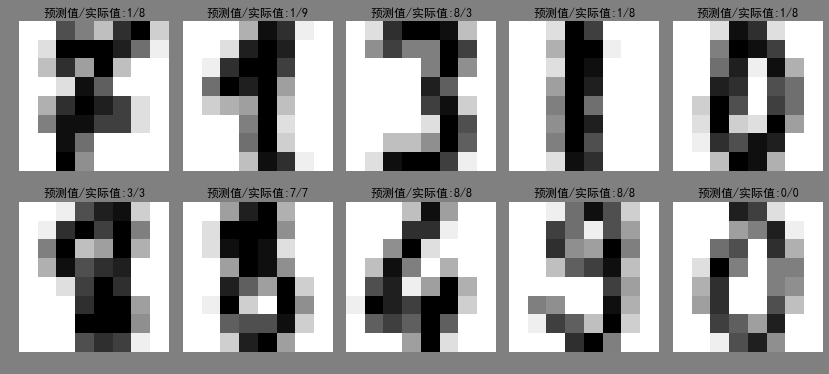

In [29]:
plt.figure(facecolor='gray', figsize=(12,5))

# 1、画出5个预测失败的，并取出预测错的值的 x值 y值 和 y的预测值
images_and_predictions = list(zip(digits.images[int(n_samples / 2):][y_test != predicted], 
                                  y_test[y_test != predicted], 
                                  predicted[y_test != predicted]))

#通过enumerate，分别拿出x值 y值 和y的预测值的前五个，并画图
for index,(image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')   # 把cmap中的灰度值与image矩阵对应，并填充
    plt.title('预测值/实际值:%i/%i' % (prediction, expection))

# 2、画出5个预测成功的
images_and_predictions = list(zip(digits.images[int(n_samples / 2):][y_test == predicted], 
                                  y_test[y_test == predicted], 
                                  predicted[y_test == predicted]))

for index, (image,expection, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 6)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('预测值/实际值:%i/%i' % (prediction, expection))

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()